<a href="https://colab.research.google.com/github/Renuga16/BigMart-Sales-Analysis-and-Prediction/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

Reading the csv file


In [6]:
df = pd.read_csv('/content/drive/MyDrive/prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [7]:
# some summary statistics of prosperloanData
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
#the complete nature of the data colums(Attributes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

<Axes: >

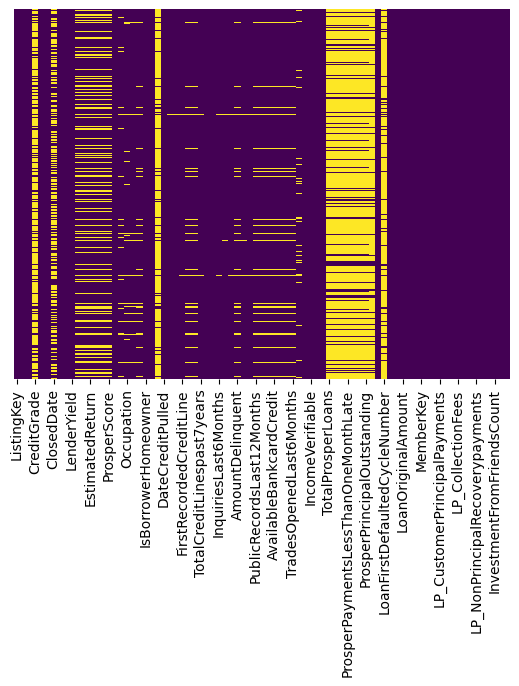

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='count', ylabel='LoanStatus'>

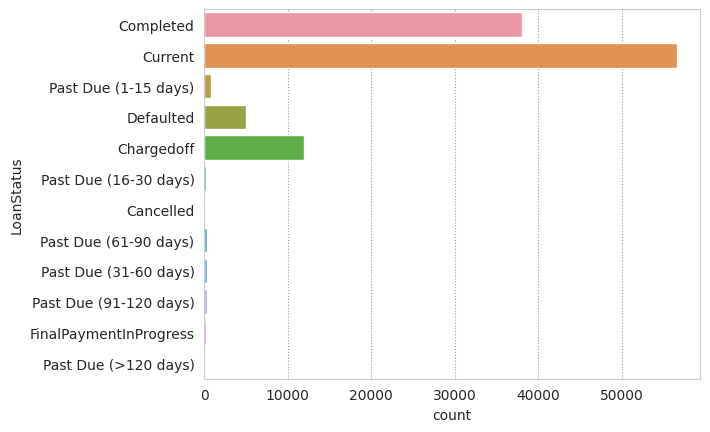

In [10]:
#Reading the histogram of the loanStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='LoanStatus',data=df)

<Axes: xlabel='count', ylabel='EmploymentStatus'>

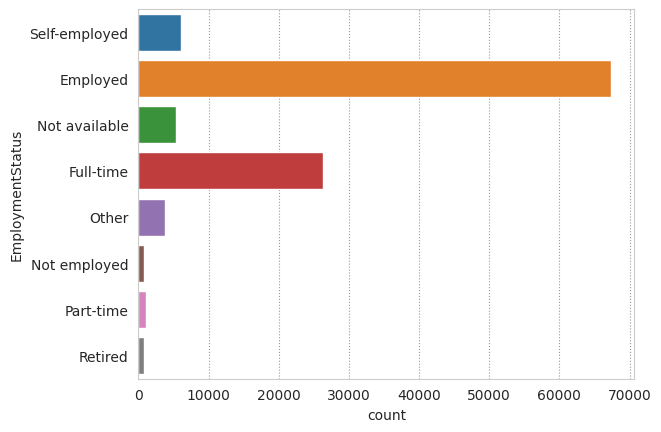

In [11]:
#Reading the histogram of the employeementStatus
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.countplot(y='EmploymentStatus',data=df)

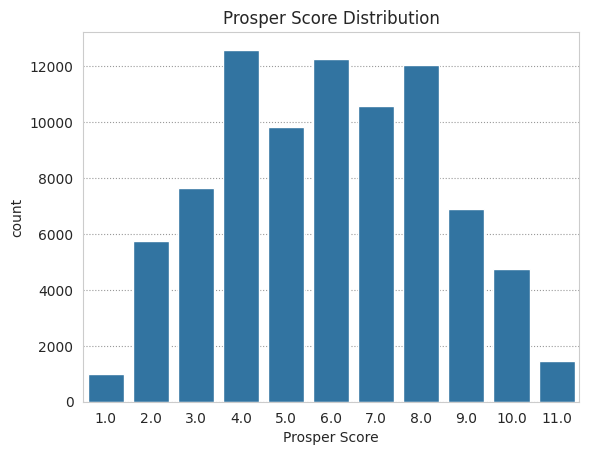

In [12]:
#Prosper Score Distribution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');



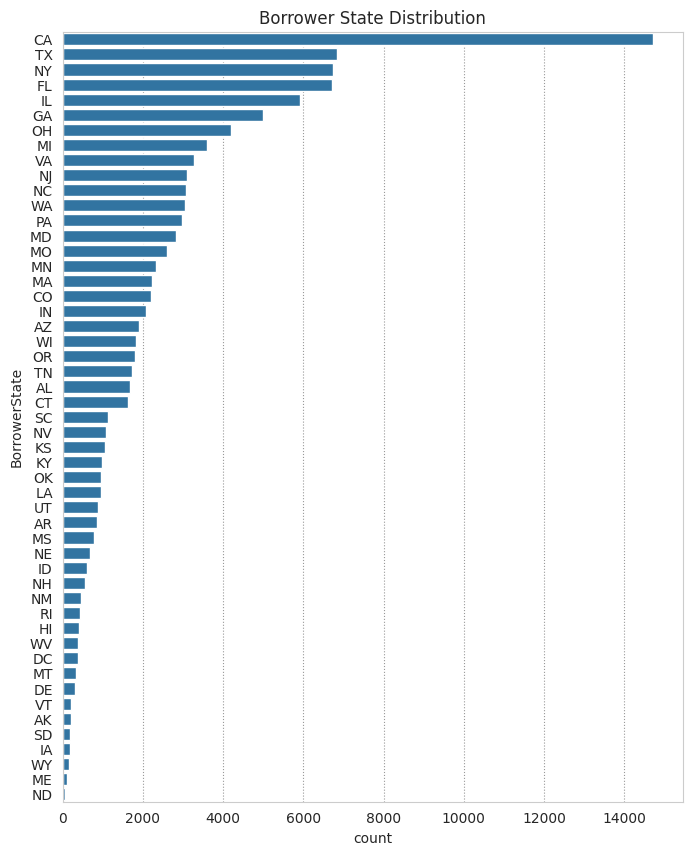

In [13]:
#Borrower State Distrobution
cat_order = df.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

Text(0.5, 1.0, 'Borrower Occupation Distribution')

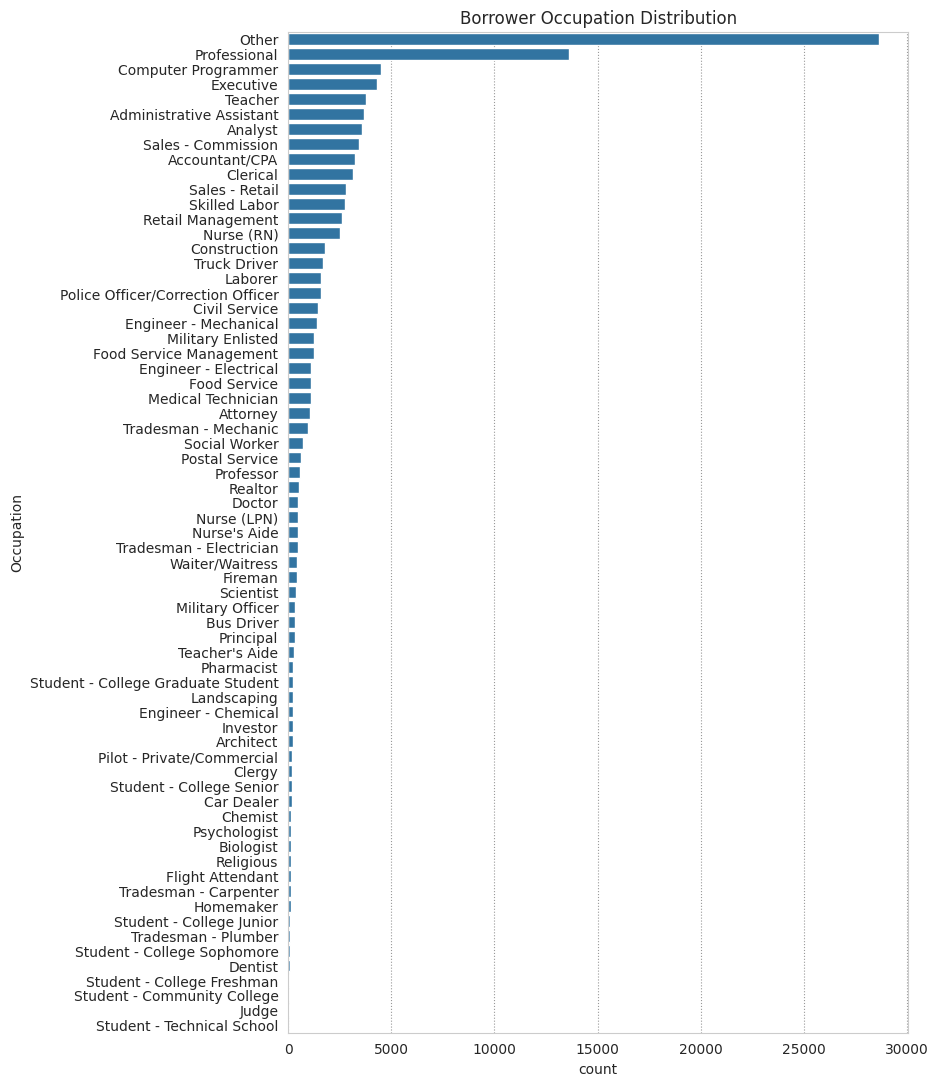

In [14]:
#Borrower Occupation Distrobution
cat_order = df.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution')

checking the prosper loan payment that has been delayed one month

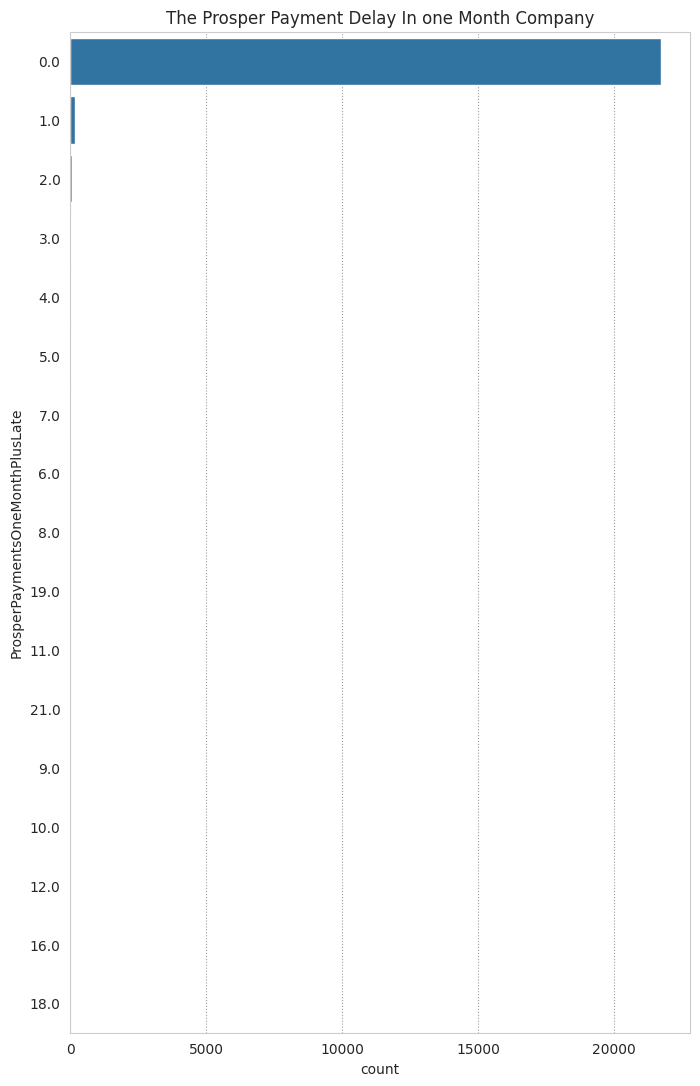

In [15]:
cat_order = df.ProsperPaymentsOneMonthPlusLate.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df,y='ProsperPaymentsOneMonthPlusLate',color=base_color, order=cat_order);
plt.title('The Prosper Payment Delay In one Month Company');

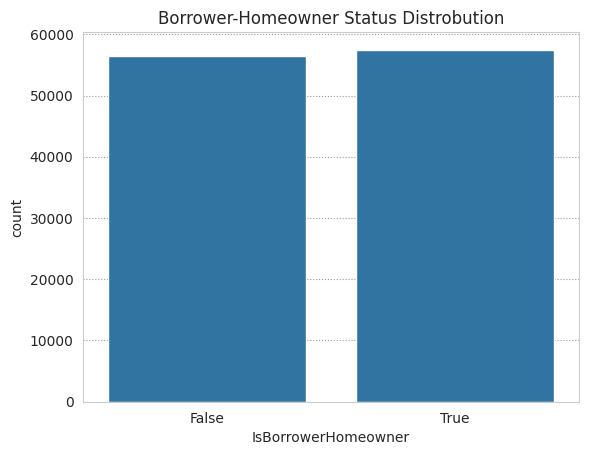

In [16]:
#Is Borrower-Homeowner Status Distrobution
base_color = sns.color_palette()[0]
sns.countplot(data=df,x= 'IsBorrowerHomeowner',color=base_color);
plt.title('Borrower-Homeowner Status Distrobution')
plt.xlabel('IsBorrowerHomeowner');

Borrower APR vs Status of Loan and Borrower APR vs Employment status
On the left: Current and completed loans have lower rate
than the past-due loans
On the right: Employed people have lower rates than not employed

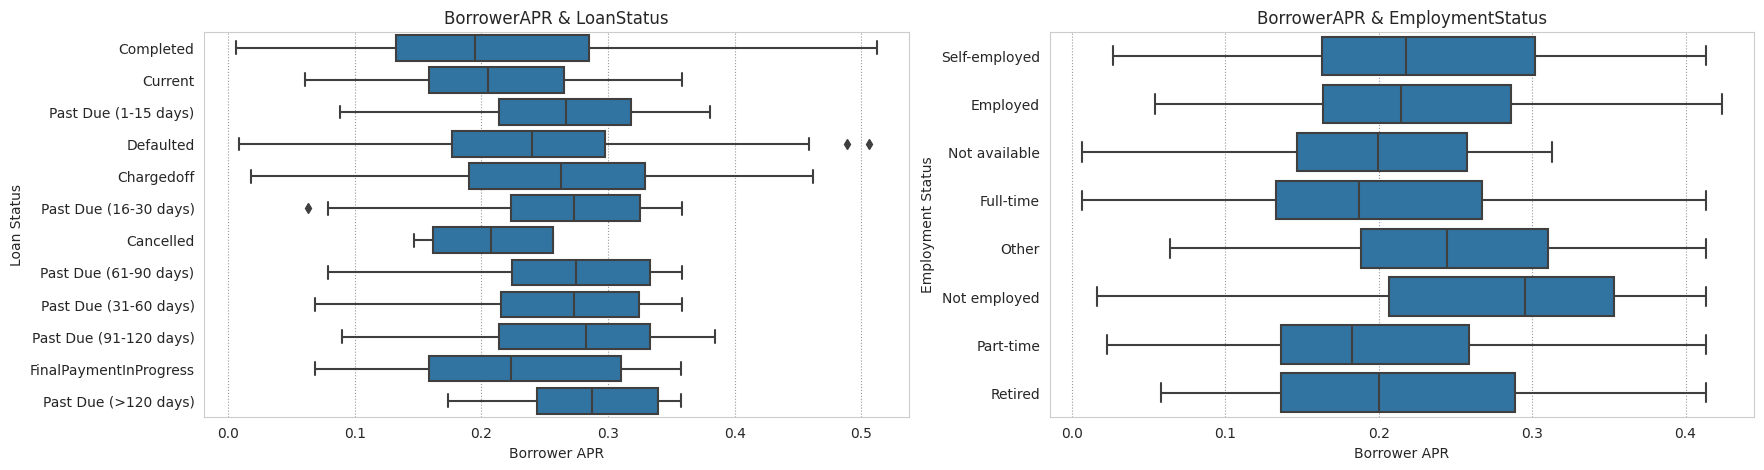

In [17]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');


Employed people can get larger loan amounts compared to all other categories.

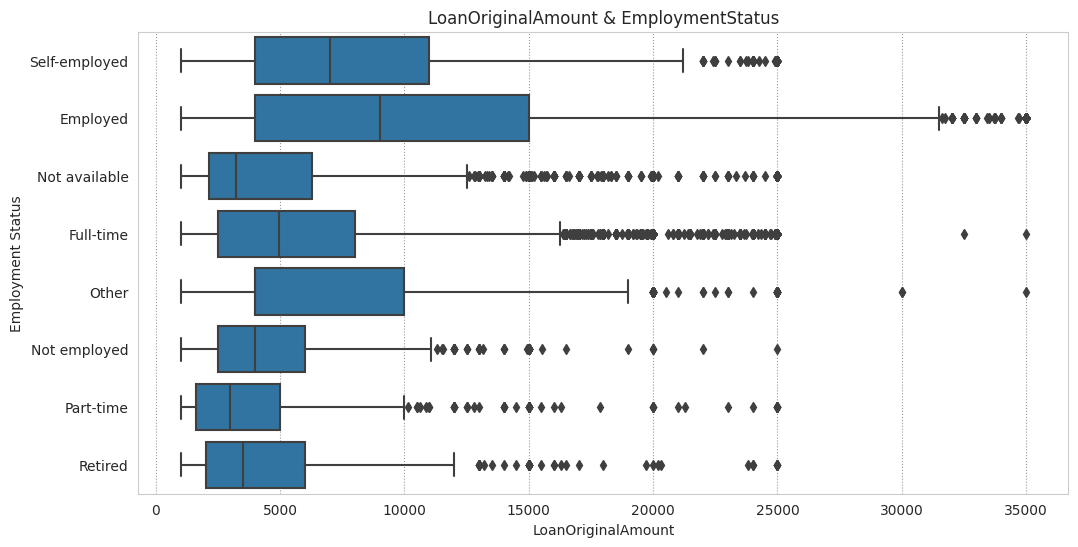

In [18]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

In [19]:
df.shape

(113937, 81)

In [20]:
#displayinng the duplicates data into the loan data
df.duplicated().sum()

0

In [21]:
# Changing Loan orgination date into date time format
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [22]:
#check missing value
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [23]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


<Axes: xlabel='BorrowerAPR', ylabel='Density'>

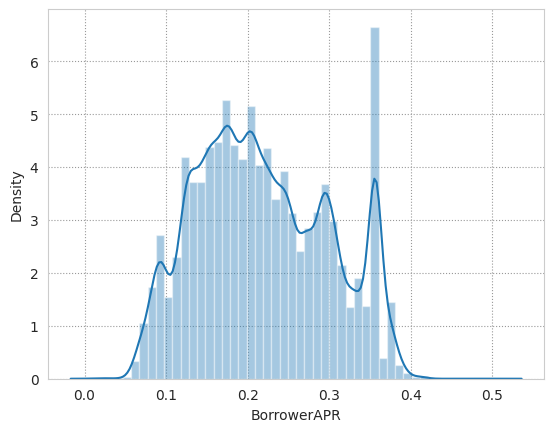

In [24]:
sns.distplot(df['BorrowerAPR'])

<Axes: xlabel='EmploymentStatusDuration', ylabel='Density'>

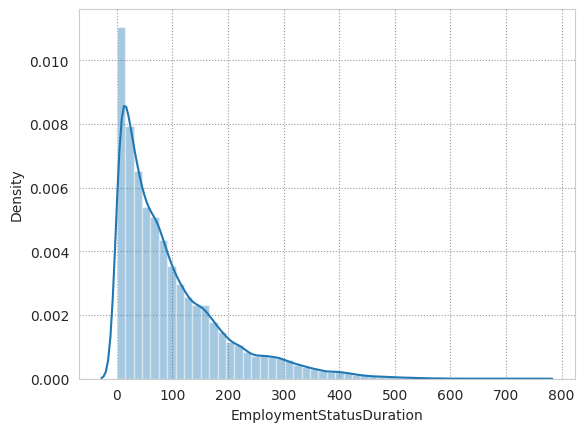

In [25]:
sns.distplot(df['EmploymentStatusDuration'])

<Axes: xlabel='ProsperScore', ylabel='Density'>

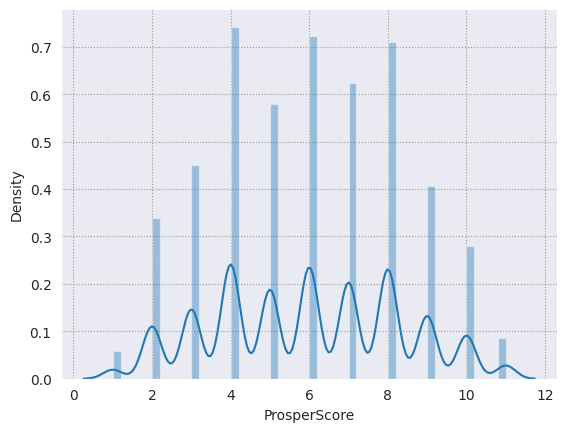

In [26]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.distplot(df['ProsperScore'])

<Axes: ylabel='TotalProsperLoans'>

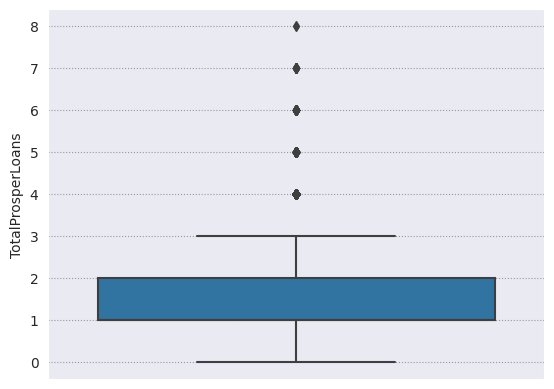

In [27]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.boxplot(y='TotalProsperLoans',data=df)

In [28]:
#categorical data (There is no outlier detection for categorical data)
df['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [29]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [30]:
df['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [31]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [33]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [34]:
df_loan = df.copy()

In [35]:
### Dropping column
df_loan.drop(['ListingCreationDate','LoanOriginationDate','GroupKey','CreditGrade','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [36]:
df_loan.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          55089 non-null   object 
 4   BorrowerAPR                         113912 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   LenderYield                         113937 non-null  float64
 7   ProsperRating (Alpha)               84853 non-null   object 
 8   ProsperScore                        84853 non-null   float64
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  BorrowerState                       108422 non-null  object 
 11  Occupation                

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


Methods for dealing with missing values imputation

In [37]:
# All are categorical data so we use mode concept
cols = ['ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']


for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)

ClosedDate
ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


In [38]:
### All are numerical columns so we use mean concept.
cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber']


for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)

BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
ScorexChangeAtTimeOfListing
LoanFirstDefaultedCycleNumber


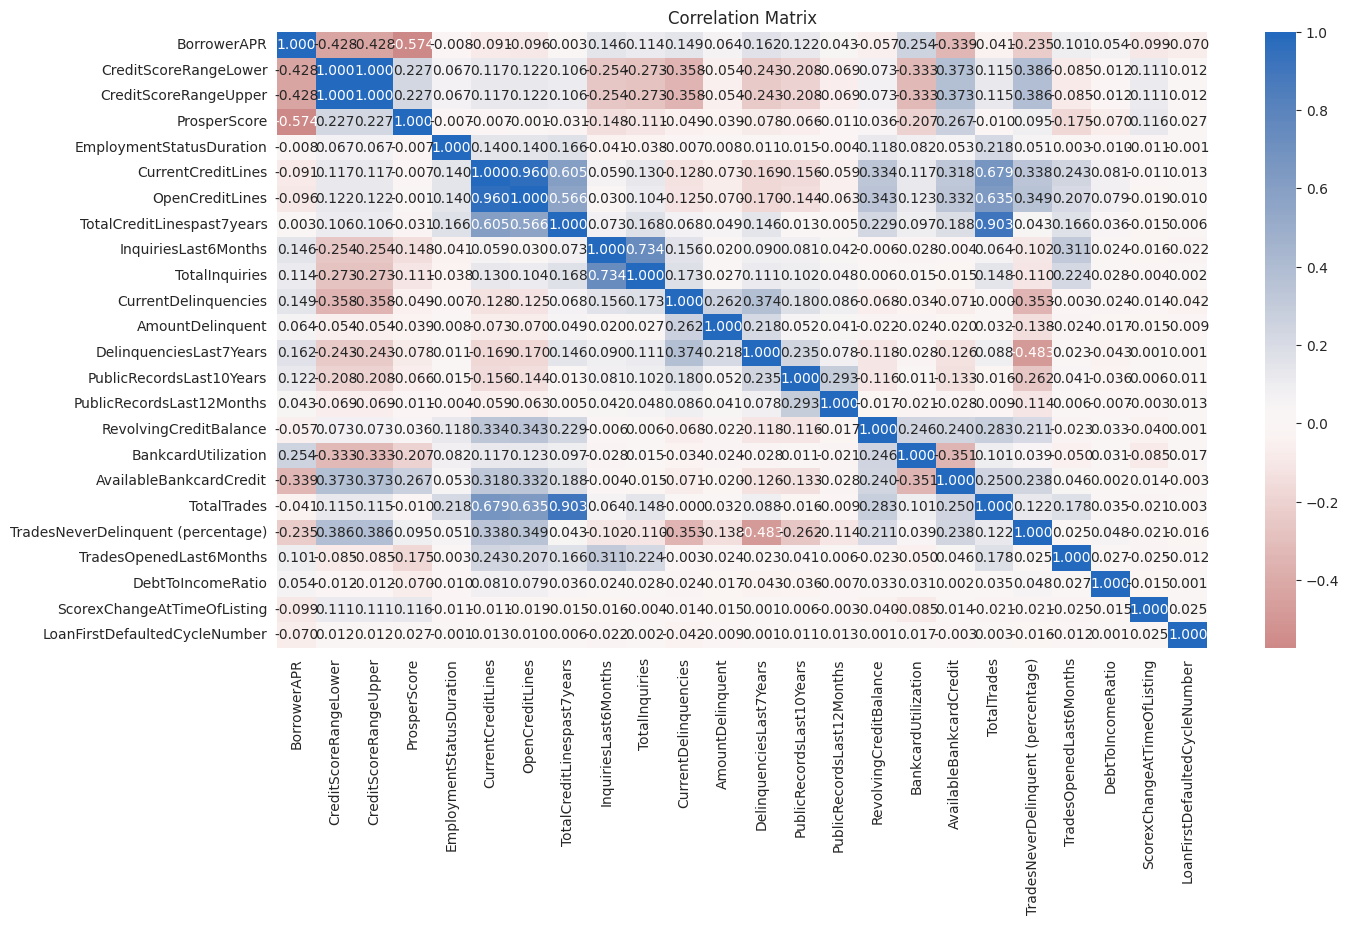

In [39]:
# Matrix of correlations for all numerical variables
plt.figure(figsize = [15, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix')
plt.margins(x = 0.5, y= 0.3)
plt.show()

In [40]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingNumber                       113937 non-null  int64  
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   ClosedDate                          113937 non-null  object 
 4   BorrowerAPR                         113937 non-null  float64
 5   BorrowerRate                        113937 non-null  float64
 6   LenderYield                         113937 non-null  float64
 7   ProsperRating (Alpha)               113937 non-null  object 
 8   ProsperScore                        113937 non-null  float64
 9   ListingCategory (numeric)           113937 non-null  int64  
 10  BorrowerState                       113937 non-null  object 
 11  Occupation                

Encoding the categorical columns

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['LoanStatus','ClosedDate','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']

df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)

In [42]:
df_loan.head()

,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,2,1136,0.16516,0.1580,0.1380,3,5.950067,0,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,3,2795,0.12016,0.0920,0.0820,0,7.000000,2,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,2,1261,0.28269,0.2750,0.2400,3,5.950067,0,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,3,2795,0.12528,0.0974,0.0874,0,9.000000,16,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,3,2795,0.24614,0.2085,0.1985,4,4.000000,2,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Feature Engineering

Building the Model

In [43]:
X = df_loan.drop(columns='LoanStatus', axis=1)
Y = df_loan['LoanStatus']

In [44]:
X

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,36,1136,0.16516,0.1580,0.1380,3,5.950067,0,5,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,36,2795,0.12016,0.0920,0.0820,0,7.000000,2,5,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,36,1261,0.28269,0.2750,0.2400,3,5.950067,0,10,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,36,2795,0.12528,0.0974,0.0874,0,9.000000,16,10,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,36,2795,0.24614,0.2085,0.1985,4,4.000000,2,23,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,36,2795,0.22354,0.1864,0.1764,3,5.000000,1,14,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,537216,36,2795,0.13220,0.1110,0.1010,0,8.000000,7,38,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,1069178,60,2795,0.23984,0.2150,0.2050,4,3.000000,1,43,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,539056,60,2592,0.28408,0.2605,0.2505,3,5.000000,2,10,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [45]:
Y

0         2
1         3
2         2
3         3
4         3
         ..
113932    3
113933    5
113934    3
113935    2
113936    3
Name: LoanStatus, Length: 113937, dtype: int64

Splitting the data into training data & Testing data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

In [47]:
print(Y_train, X_train.shape, X_test.shape)

108280    4
111918    3
6518      3
39837     3
83645     3
         ..
65615     2
77655     2
79683     2
56088     3
38408     1
Name: LoanStatus, Length: 91149, dtype: int64 (91149, 64) (22788, 64)


In [50]:
X.shape

(113937, 64)

In [49]:
X_train.shape

(91149, 64)

In [48]:
X_test.shape

(22788, 64)

Feature Selection

Plotting the LP_CollectionFees and LP_ServiceFees columns in our dataset

Text(0.5, 1.0, 'LP_CollectionFees and LP_ServiceFees')

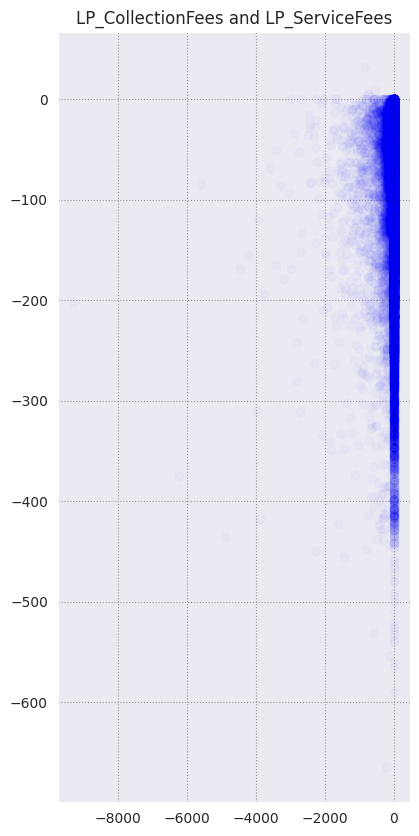

In [51]:
alpha = 0.02
plt.figure(figsize=(10,10))
# data = df

# LP_CollectionFees and LP_ServiceFees

plt.subplot(121)
plt.scatter(df.LP_CollectionFees, df.LP_ServiceFees, color='blue', alpha=alpha)
plt.title('LP_CollectionFees and LP_ServiceFees')

Text(0.5, 1.0, 'LP_CollectionFees and LP_ServiceFees')

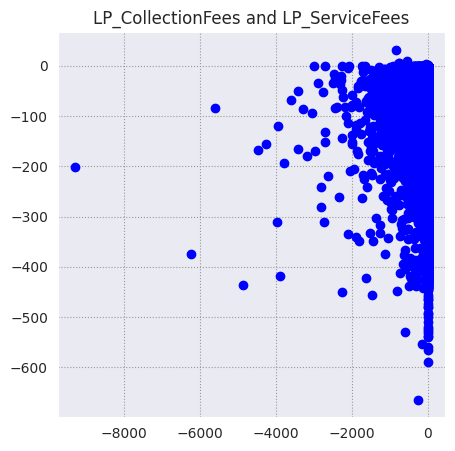

In [52]:
#the basically contain the same info
#Lets us see how LP_CollectionFees and LP_ServiceFees differ
plt.figure(figsize=(5,5))
plt.scatter(df.LP_CollectionFees,df.LP_ServiceFees, color='blue')
plt.title('LP_CollectionFees and LP_ServiceFees')

ONE HOT ENCODING

In [53]:
# import packages
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# define example
data = np.array(['PercentFunded', 'PercentFunded', 'Investors', 'PercentFunded', '  LoanNumber', '  LoanNumber', 'Investors', 'PercentFunded', 'Investors', '  LoanNumber'])

# integer encode
label_encoder = LabelEncoder()

#fit and transform the data
integer_encoded = label_encoder.fit_transform(data)
print(integer_encoded)

# one-hot encode
onehot_encoder = OneHotEncoder(sparse=False)

#reshape the data
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[2 2 1 2 0 0 1 2 1 0]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


Applying the Machine learning Algorithm

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
import pandas as pd
df = pd.read_csv('prosperLoanData.csv')
X_train, x_test, y_train, y_test, = train_test_split(df[['PercentFunded']],df.MonthlyLoanPayment,test_size=0.1)

In [54]:
X_train

,ListingNumber,Term,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
108280,276814,36,1050,0.20875,0.1940,0.1840,3,5.950067,3,35,...,-95.75,-249.73,7905.90,7905.90,1000.0,1.0,0,0,0.0,204
111918,932006,60,2795,0.21935,0.1950,0.1850,3,7.000000,1,16,...,-101.34,0.00,0.00,0.00,0.0,1.0,0,0,0.0,275
6518,1051441,60,2795,0.18197,0.1585,0.1485,3,7.000000,1,49,...,-15.20,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
39837,1165440,36,2795,0.14206,0.1139,0.1039,0,8.000000,1,20,...,-26.85,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
83645,1217019,60,2795,0.23293,0.2080,0.1980,4,3.000000,1,6,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,839230,60,2655,0.13227,0.1099,0.0999,0,7.000000,3,10,...,-30.63,0.00,0.00,0.00,0.0,1.0,0,0,0.0,118
77655,10685,36,382,0.15893,0.1500,0.1450,3,5.950067,0,4,...,-10.09,0.00,0.00,0.00,0.0,1.0,0,0,0.0,22
79683,488994,36,1887,0.33097,0.2950,0.2850,4,6.000000,1,45,...,-25.41,0.00,0.00,0.00,0.0,1.0,0,0,0.0,131
56088,1189962,60,2795,0.14147,0.1189,0.1089,0,11.000000,1,31,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1


In [57]:
x_test

,PercentFunded
8683,1.0
44620,1.0
6767,1.0
45895,1.0
6815,1.0
...,...
8782,1.0
27971,1.0
18379,1.0
19922,1.0


In [58]:
y_train

13048    380.73
11965     84.90
28623    275.87
13913    418.46
44097    660.14
          ...  
5283     111.78
33437    237.55
14292    127.36
7456     451.89
38550    390.03
Name: MonthlyLoanPayment, Length: 41434, dtype: float64

In [68]:
y_test

8683     142.31
44620    163.56
6767     154.26
45895    126.67
6815      78.47
          ...  
8782     331.41
27971    854.44
18379    644.41
19922      0.00
33511    102.05
Name: MonthlyLoanPayment, Length: 4604, dtype: float64